In [10]:
import pandas as pd
import numpy as np

In [11]:
# I create sample data

data = {
    "TV_Ads": [10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000],
    "Social_Ads": [5000, 7000, 8000, 10000, 12000, 15000, 17000, 20000, 22000, 25000],
    "Price": [50, 48, 47, 45, 44, 42, 40, 39, 38, 36],
    "Sales": [200000, 230000, 260000, 300000, 330000, 370000, 410000, 450000, 480000, 520000]
}

df = pd.DataFrame(data)
df

,TV_Ads,Social_Ads,Price,Sales
0,10000,5000,50,200000
1,15000,7000,48,230000
2,20000,8000,47,260000
3,25000,10000,45,300000
4,30000,12000,44,330000
5,35000,15000,42,370000
6,40000,17000,40,410000
7,45000,20000,39,450000
8,50000,22000,38,480000
9,55000,25000,36,520000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TV_Ads      10 non-null     int64
 1   Social_Ads  10 non-null     int64
 2   Price       10 non-null     int64
 3   Sales       10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [13]:
df.describe()

,TV_Ads,Social_Ads,Price,Sales
count,10.00000,10.000000,10.000000,10.000000
mean,32500.00000,14100.000000,42.900000,355000.000000
std,15138.25177,6806.043066,4.653553,109265.222687
min,10000.00000,5000.000000,36.000000,200000.000000
25%,21250.00000,8500.000000,39.250000,270000.000000
50%,32500.00000,13500.000000,43.000000,350000.000000
75%,43750.00000,19250.000000,46.500000,440000.000000
max,55000.00000,25000.000000,50.000000,520000.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# I want to find out correlation between data

corr_matrix = df.corr()
corr_matrix

,TV_Ads,Social_Ads,Price,Sales
TV_Ads,1.000000,0.994840,-0.997603,0.999210
Social_Ads,0.994840,1.000000,-0.992456,0.997314
Price,-0.997603,-0.992456,1.000000,-0.997543
Sales,0.999210,0.997314,-0.997543,1.000000


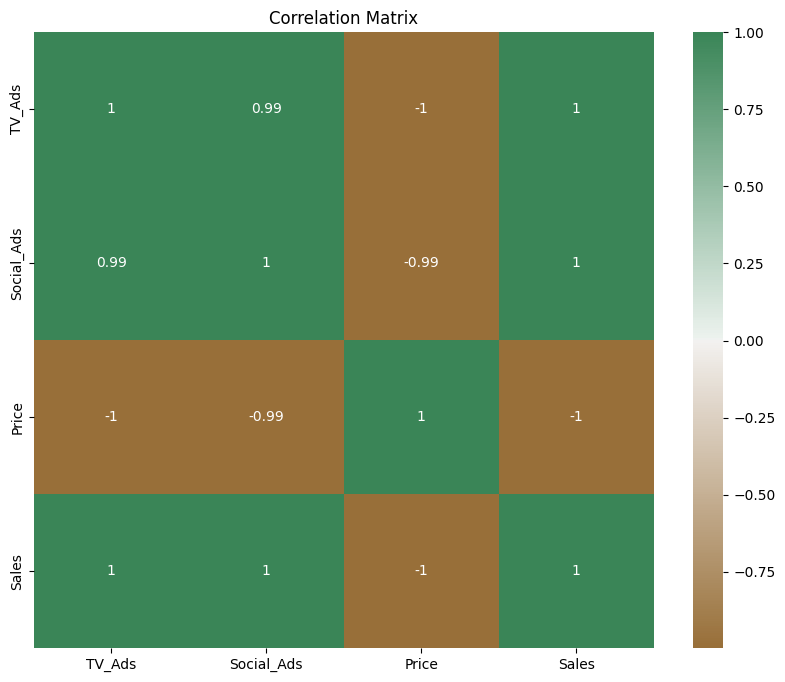

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(50, 500, n=500))
plt.title("Correlation Matrix")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# I define target (prediction) and features

X = df[["TV_Ads", "Social_Ads", "Price"]]
y = df["Sales"]

In [19]:
# I split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# I want to see model coefficient

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).round(2)

print(f"Intercept:, {model.intercept_:.2f}")
print(coefficients)

Intercept:, 485471.70
      Feature  Coefficient
0      TV_Ads         2.26
1  Social_Ads         6.23
2       Price     -6792.45


In [22]:
"""
We found out this result:

Each $1 increase in TV Ads → Sales increase by $2.26

Each $1 increase in Social Ads → Sales increase by $6.23

Each $1 increase in Price → Sales decrease by $6792.45

"""

'\nWe found out this result:\n\nEach $1 increase in TV Ads → Sales increase by $2.26\n\nEach $1 increase in Social Ads → Sales increase by $6.23\n\nEach $1 increase in Price → Sales decrease by $6792.45\n\n'

In [23]:
# we predict the model now

y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual Sales": y_test,
    "Predicted Sales": y_pred
}).round(2)

print(comparison)

   Actual Sales  Predicted Sales
8        480000        477547.17
1        230000        236981.13


In [24]:
# we evaluate the model now

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R²: 0.9982479174083305
MSE: 27376290.494836453
RMSE: 5232.235707117604


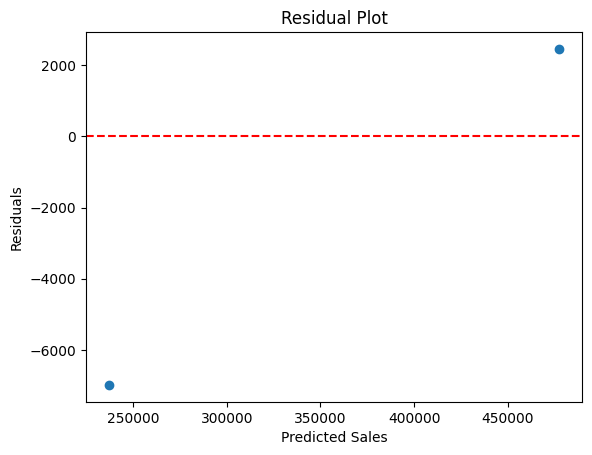

In [25]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [26]:
# What if we spend $100,000 on TV, $50,000 on Social Ads, and set price to $60?

new_data = pd.DataFrame({
    "TV_Ads": [100000],
    "Social_Ads": [50000],
    "Price": [60]
})

prediction = model.predict(new_data)

print("Predicted Sales:", prediction[0])

Predicted Sales: 615660.3773584897


In [27]:
import statsmodels.api as sm

In [28]:
X_with_const = sm.add_constant(X_train)

# Fit model
model = sm.OLS(y_train, X_with_const).fit()

# Print full regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4486.
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.66e-07
Time:                        20:48:11   Log-Likelihood:                -70.775
No. Observations:                   8   AIC:                             149.5
Df Residuals:                       4   BIC:                             149.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.855e+05   1.77e+05      2.739      0.0

In [37]:
# Combine X_train and y_train for formula API
train_df = X_train.copy()
train_df['Sales'] = y_train

# Define the formula
formula = 'Sales ~ TV_Ads + Social_Ads + Price'

# Fit model using formula API
model = sm.formula.ols(formula=formula, data=train_df).fit()

# Print full regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4486.
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.66e-07
Time:                        20:58:32   Log-Likelihood:                -70.775
No. Observations:                   8   AIC:                             149.5
Df Residuals:                       4   BIC:                             149.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.855e+05   1.77e+05      2.739      0.0

In [38]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)
print(anova_results)

             df        sum_sq       mean_sq             F        PR(>F)
TV_Ads      1.0  7.603448e+10  7.603448e+10  13432.758621  3.323574e-08
Social_Ads  1.0  1.193634e+08  1.193634e+08     21.087533  1.009070e-02
Price       1.0  2.351234e+07  2.351234e+07      4.153846  1.111837e-01
Residual    4.0  2.264151e+07  5.660377e+06           NaN           NaN
